<a href="https://colab.research.google.com/github/maferrepy/Nave-Titanic-kaggle/blob/main/Nave_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prever quais passageiros são transportados para uma dimensão alternativa**

In [5]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [6]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [7]:
treino


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [8]:
#A outra substituição comum é trocar os valores de NaN pela média. Por exemplo, para substituir os valores de NaN na coluna Idade pela média.

 

treino['RoomService'].fillna(value=treino['RoomService'].mean(), inplace=True)

In [9]:
treino.fillna(axis=0, method='ffill')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [10]:
treino= treino.dropna(subset=['RoomService'])
treino= treino.dropna(subset=['FoodCourt'])
treino= treino.dropna(subset=['ShoppingMall'])
treino= treino.dropna(subset=['Spa'])
treino= treino.dropna(subset=['VRDeck'])

In [11]:
treino.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
df =treino[['RoomService', 'FoodCourt','ShoppingMall', 'Spa','VRDeck' ]]

In [13]:
df

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [14]:
treino['total_gasto'] =df.sum(axis=1)



In [15]:
treino['total_gasto'].astype(int)

0           0
1         736
2       10383
3        5176
4        1091
        ...  
8688     8536
8689        0
8690     1873
8691     4637
8692     4826
Name: total_gasto, Length: 7955, dtype: int64

In [16]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7955 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7955 non-null   object 
 1   HomePlanet    7766 non-null   object 
 2   CryoSleep     7760 non-null   object 
 3   Cabin         7769 non-null   object 
 4   Destination   7789 non-null   object 
 5   Age           7789 non-null   float64
 6   VIP           7763 non-null   object 
 7   RoomService   7955 non-null   float64
 8   FoodCourt     7955 non-null   float64
 9   ShoppingMall  7955 non-null   float64
 10  Spa           7955 non-null   float64
 11  VRDeck        7955 non-null   float64
 12  Name          7774 non-null   object 
 13  Transported   7955 non-null   bool   
 14  total_gasto   7955 non-null   float64
dtypes: bool(1), float64(7), object(7)
memory usage: 940.0+ KB


In [17]:
treino.isnull().sum()


PassengerId       0
HomePlanet      189
CryoSleep       195
Cabin           186
Destination     166
Age             166
VIP             192
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            181
Transported       0
total_gasto       0
dtype: int64

In [18]:
treino.fillna(0)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_gasto
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [19]:
treino.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_gasto
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,4826.0


In [20]:
def vip_pobre(valor):
  if valor == True:
    return 1
  else:
    return 0
treino['VIP_trip'] = treino['VIP'].map(vip_pobre)


In [21]:
treino['VIP_trip']


0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP_trip, Length: 7955, dtype: int64

In [22]:
treino['Age'].mean()

28.847605597637695

In [23]:
treino[['Age']].isna().sum()

Age    166
dtype: int64

In [24]:
Media_idade= treino['Age'].mean()

def idades (valor):
  if valor == 0 :
    return Media_idade  


In [25]:
treino['idade'] = treino['Age'].map(vip_pobre)

In [26]:
treino['idade'].isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: idade, Length: 7955, dtype: bool

In [27]:
def transportado(valor):
  if valor == True:
    return 1
  else:
    return 0
treino['dimensão'] = treino['Transported'].map(transportado)

In [28]:
treino['HomePlanet'].value_counts()




Earth     4196
Europa    1956
Mars      1614
Name: HomePlanet, dtype: int64

In [29]:
treino[['Destination','dimensão' ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7955 entries, 0 to 8692
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Destination  7789 non-null   object
 1   dimensão     7955 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 186.4+ KB


In [30]:
frequencia = pd.crosstab(treino.Destination, treino.dimensão, normalize=False, dropna=True )

In [31]:
frequencia.head()

dimensão,0,1
Destination,,
55 Cancri e,629,1013
PSO J318.5-22,363,371
TRAPPIST-1e,2890,2523


In [32]:
treino= treino.dropna(subset=['Destination'])

In [33]:
def chegada(valor):
  if valor == '55 Cancri e':
    return 0
  if valor == 'PSO J318.5-22':
    return 3  
  else:
    return 4
treino['Destino'] = treino['Destination'].map(chegada)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
treino['Destino'].value_counts()

4    5413
0    1642
3     734
Name: Destino, dtype: int64

In [35]:
frequencia = pd.crosstab(treino.Destination, treino.dimensão, normalize=False, dropna=True )
frequencia.head()

dimensão,0,1
Destination,,
55 Cancri e,629,1013
PSO J318.5-22,363,371
TRAPPIST-1e,2890,2523


In [36]:
treino['HomePlanet'].isna().sum()

185

In [37]:
def ponto_partida(valor):
  if valor == 'Earth':
    return 0
  if valor == 'Europa':
    return 5
  else:
    return 6
treino['planetas_origem'] = treino['HomePlanet'].map(ponto_partida)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
treino['planetas_origem'].value_counts()

0    4106
5    1923
6    1760
Name: planetas_origem, dtype: int64

In [39]:

treino= treino.dropna(subset=['planetas_origem'])

In [40]:
treino= treino.dropna(subset=['planetas_origem'])

In [41]:
treino['planetas_origem'].isna().sum()

0

In [42]:
# modicando para float a coluna CryoSleep 

In [43]:
treino['CryoSleep'].mean()

0.35698301961300516

In [44]:
def csp(valor):
  if valor == True:
    return 7
  else:
    return 8

treino['Adormecendo'] = treino['CryoSleep'].map(csp)

In [45]:
treino[['Adormecendo']].value_counts()

Adormecendo
8              5077
7              2712
dtype: int64

In [46]:
treino.isna().any().sum()


6

In [47]:
treino.isna().sum()

PassengerId          0
HomePlanet         185
CryoSleep          192
Cabin              183
Destination          0
Age                164
VIP                188
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name               177
Transported          0
total_gasto          0
VIP_trip             0
idade                0
dimensão             0
Destino              0
planetas_origem      0
Adormecendo          0
dtype: int64

In [48]:
treino.duplicated().sum()

0

In [49]:
df = treino [['idade','planetas_origem','VIP_trip','total_gasto','Destino']]

In [50]:
df

,idade,planetas_origem,VIP_trip,total_gasto,Destino
0,0,5,0,0.0,4
1,0,0,0,736.0,4
2,0,5,1,10383.0,4
3,0,5,0,5176.0,4
4,0,0,0,1091.0,4
...,...,...,...,...,...
8688,0,5,1,8536.0,0
8689,0,0,0,0.0,3
8690,0,0,0,1873.0,4
8691,0,5,0,4637.0,0


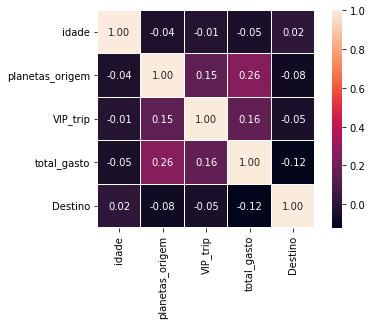

In [51]:
sns.heatmap(df.corr(), fmt = '.2f', linewidths=0.1, vmax=1.0, 
            square=True, linecolor = 'white', annot=True);

In [82]:
variaveis =['idade','planetas_origem','total_gasto','Destino']
X = treino[variaveis].fillna(-1)
y = treino['Transported']

In [53]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [54]:
X_treino.head()

,idade,planetas_origem,VIP_trip,total_gasto,Destino
8375,0,0,0,0.0,4
6302,0,0,0,1722.0,4
5011,0,6,0,1775.0,3
4997,0,0,0,710.0,4
1131,0,5,0,0.0,0


In [55]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((3894, 5), (3895, 5), (3894,), (3895,))

In [56]:
modelo = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)

In [57]:
p = modelo.predict(X_valid)

In [58]:
np.mean(y_valid == p)

0.7014120667522464

In [59]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
resultados = []
for rep in range(10):
    print("Rep:", rep)
    kf = KFold(n_splits=5, shuffle=True, random_state=10)
    
    for linhas_treino, linhas_valid in kf.split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(X_treino, y_treino)

        p = modelo.predict(X_valid)

        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acc:", acc)
        print()


In [61]:
teste.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [63]:
np.mean(resultados)

0.701759827455287

In [64]:
# usando o planeta de  saida e a soma de gasto chegamos a 0.6816408117835535 de acuracia
# Usando Age e 	total_gasto chegamos a 0.6793628204508892 de Acuracia
# usando Age e destino chegamos a 0.7006112873321635
# usando ['planetas_origem','Adormecendo','VIP_trip'] = 

# tpot

In [99]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.8 MB/s 


In [66]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.9 MB/s 
     |████████████████████████████████| 160 kB 25.2 MB/s 
     |████████████████████████████████| 192.9 MB 66 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=9553886bb2332dd0ba3f67e18ba45766b08d27c4f793ed7f3343c2245dd4efc5
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [67]:
from tpot import TPOTClassifier

In [68]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((6232, 5), (1557, 5), (6232,), (1557,))

In [87]:
tpot = TPOTClassifier(verbosity=4, n_jobs=-1, max_time_mins=120, scoring='roc_auc', random_state=0, cv=6, generations=None, population_size=150, early_stop=True, log_file='tpot_classifier.txt')

In [88]:
tpot.fit(X_treino, y_treino)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]

TPOTClassifier(cv=6, early_stop=True, generations=1000000,
               log_file='tpot_classifier.txt', max_time_mins=120, n_jobs=-1,
               population_size=150, random_state=0, scoring='roc_auc',
               verbosity=4)

In [93]:
print(tpot.score(X_valid, y_valid ))

0.7871470497935037


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [107]:
import pygame

In [115]:

pygame.init()
pygame.mixer.music.load('/content/ex01.mp3')
pygame.mixer.music.play()
pygame.event.wait()

error: ignored

In [90]:
resultado = pd.DataFrame(tpot.evaluated_individuals_)
resultado.columns = list(map(lambda x: x[0], resultado.columns.str.split('(')))
df = resultado.T

In [91]:
ordenado = df.sort_values(by='internal_cv_score',ascending=False)

In [97]:
p = ordenado['internal_cv_score'] 

In [98]:
p.head()

ExtraTreesClassifier          0.786297
ExtraTreesClassifier          0.785834
GradientBoostingClassifier    0.785212
GradientBoostingClassifier    0.784792
GradientBoostingClassifier    0.784541
Name: internal_cv_score, dtype: object